# Regressão Linear

In [1]:
## importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## Estudo sobre consumo de cerveja - Kaggle

In [3]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
dados.shape

(365, 7)

In [5]:
## estatistica descritiva

dados.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


### Matriz de Correlação

In [6]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


### Comportamento da Variável Dependente (y)

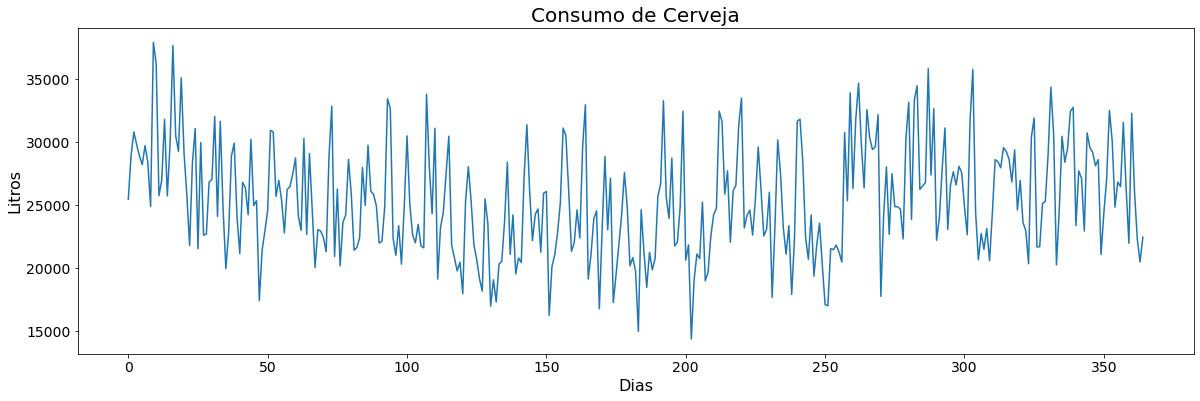

In [7]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

### Box Plot

In [8]:
## importando seaborn

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

Text(0.5, 0, 'Litros')

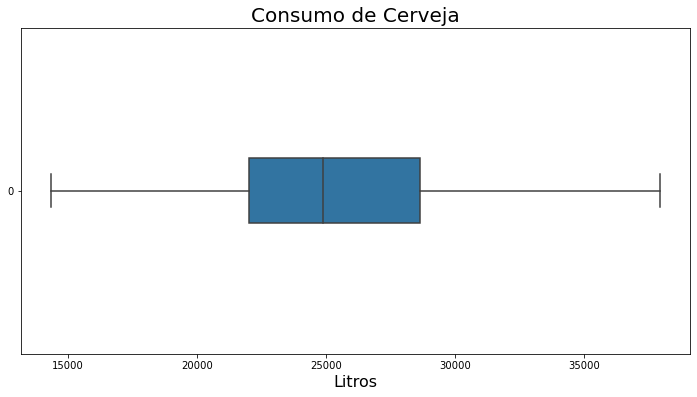

In [9]:
## box plt da variável dependente

ax = sns.boxplot(data=dados['consumo'], orient='h', width=0.2);

ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)

### Box Plot - Duas Variáveis

Text(0.5, 0, 'Final de Semana')

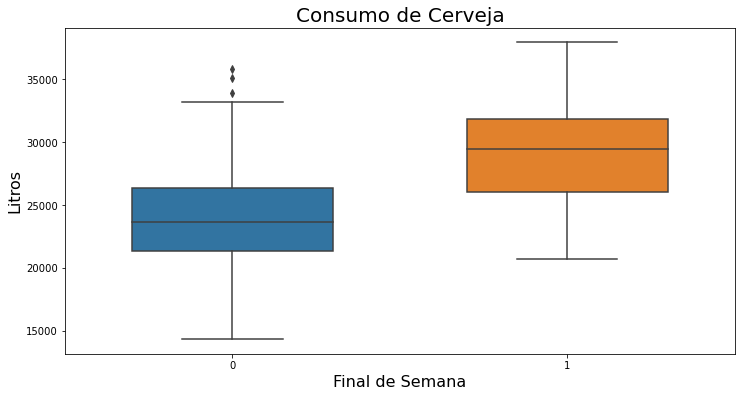

In [10]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.6)

ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)

### Distribuição de Frequências

Text(0, 0.5, 'Consumo de Cerveja (Litros)')

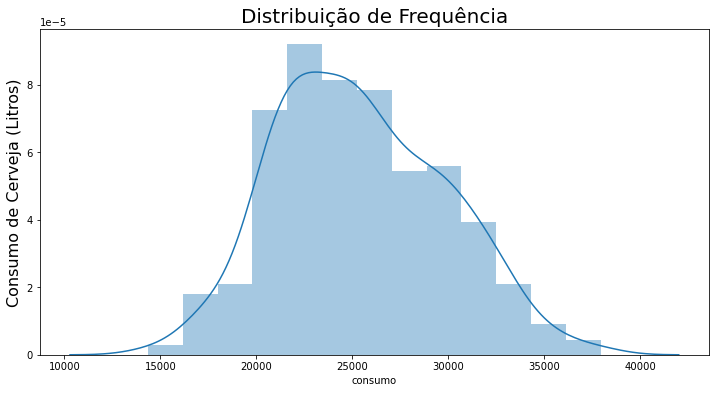

In [11]:
ax = sns.distplot(dados['consumo']);
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

### Variável Dependente x Variável Explicativa (pairplot)

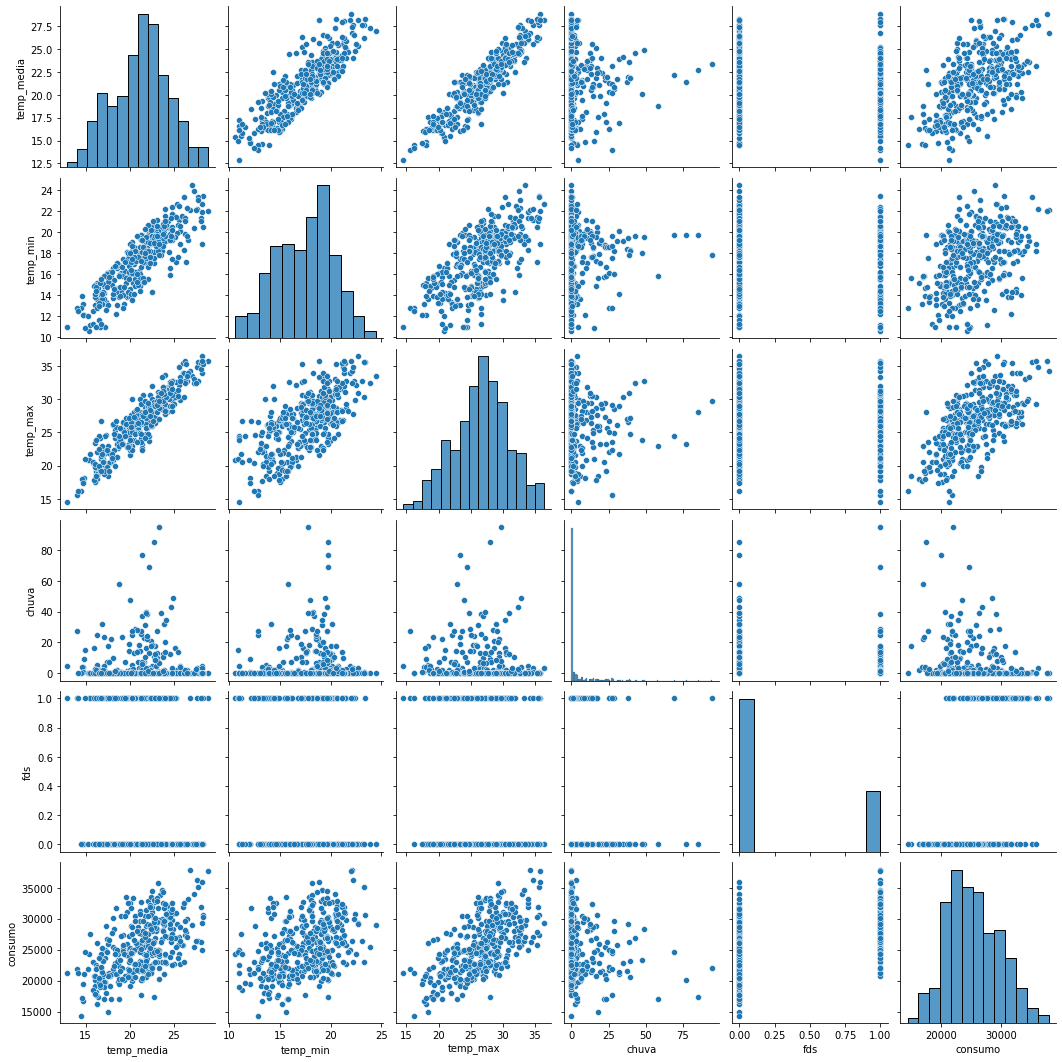

In [12]:
ax = sns.pairplot(dados)

### Plotando o Pairplot e fixando somente uma variável no Eixo Y

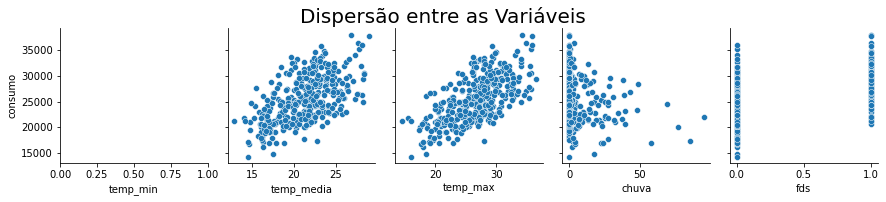

In [13]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max','chuva', 'fds']);
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.08);

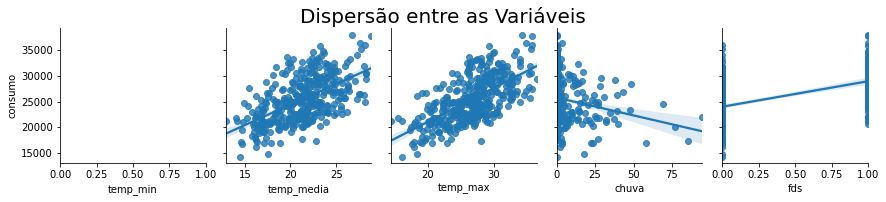

In [14]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max','chuva', 'fds'], kind='reg');
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.08);

### Jointplot

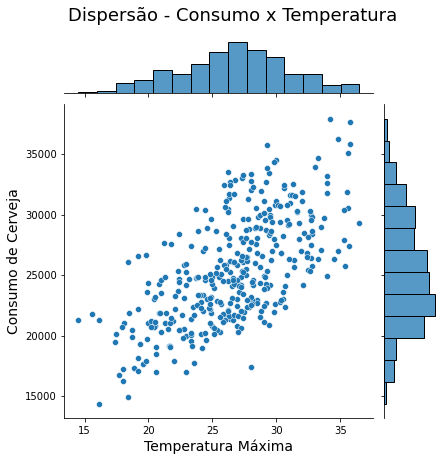

In [15]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados);
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)

### Jointplot + Reta de Regressão

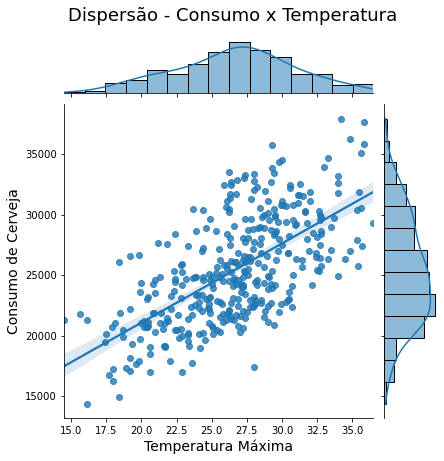

In [16]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg');
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize=18, y=1.05);
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14);

### Lmplot

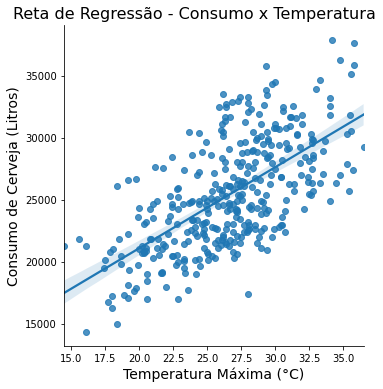

In [17]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax

### Lmplot com mais variável

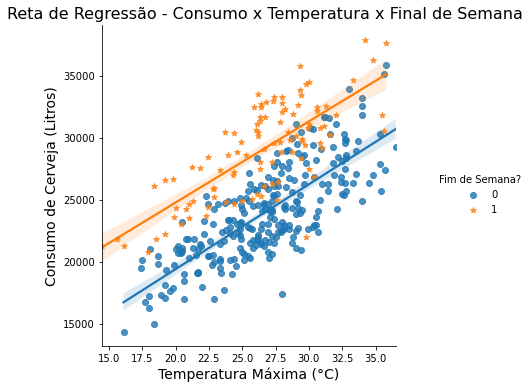

In [18]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

### Lmplot em dois plots

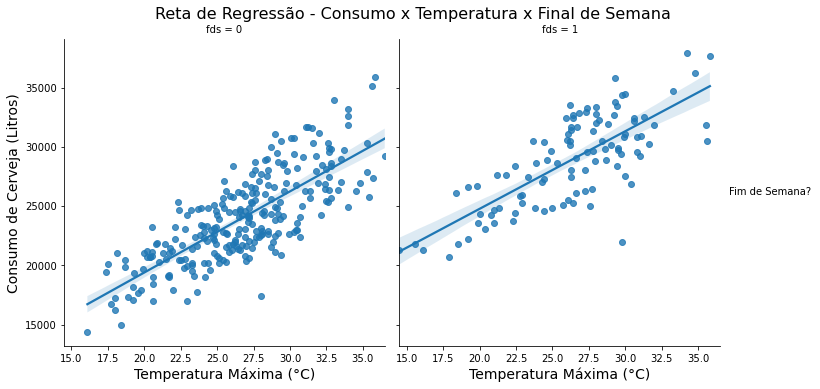

In [19]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, col='fds')
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima (°C)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (Litros)', fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

## Importando Scikit Learn

In [20]:
from sklearn.model_selection import train_test_split

### Criando uma Series para armazenar o Consumo de Cerveja (y)

In [21]:
y = dados['consumo']

### Criando um df para armazenar as variáveis explicativas (x)

In [22]:
x = dados[['temp_max', 'chuva', 'fds']]

### Criando os datasets de treino e de teste

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

### Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [24]:
x_train.shape

(255, 3)

In [25]:
y_train.shape

(255,)

In [26]:
x_test.shape

(110, 3)

In [27]:
y_test.shape

(110,)

In [28]:
## importando

from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Instanciando a classe LinearRegression

In [29]:
modelo = LinearRegression()

### Utilizando o método fit() do objeto 'modelo' para estimar nosso modelo linear utilizando os dados de treino(y_train e x_train)

In [30]:
modelo.fit(x_train, y_train)

LinearRegression()

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

In [31]:
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

R² = 0.73


### Gerando previsões para os dados de teste (x_test) utilizando o método predict() do objeto 'modelo'

In [32]:
y_prev = modelo.predict(x_test)

### Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [33]:
print('R² = %s' % metrics.r2_score(y_test, y_prev).round(2))

R² = 0.69


## Obtendo Previsões Pontuais

In [34]:
## dados de entrada

entrada = x_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [35]:
## gerando previsão pontual

modelo.predict(entrada)[0]

26094.901775262017

In [36]:
## criando um simulador simples

temp_max = 30.5
chuva = 12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Interpretação dos Coeficientes Estimados

### Obtendo o intercpto do modelo

In [37]:
modelo.intercept_

5951.9763393124485

In [38]:
## checagem de variação de coeficientes

modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [39]:
## confirmando a ordem das variáveis explicativas no df

x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [40]:
## criando uma lista com os nomes das variáveis do modelo

index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

In [41]:
## criando um df para armazenar os coeficientes do modelo

pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Análises Gráficas das Previsões do Modelo

In [42]:
## gerando previsões do modelo para os dados de treino

y_prev_train = modelo.predict(x_train)

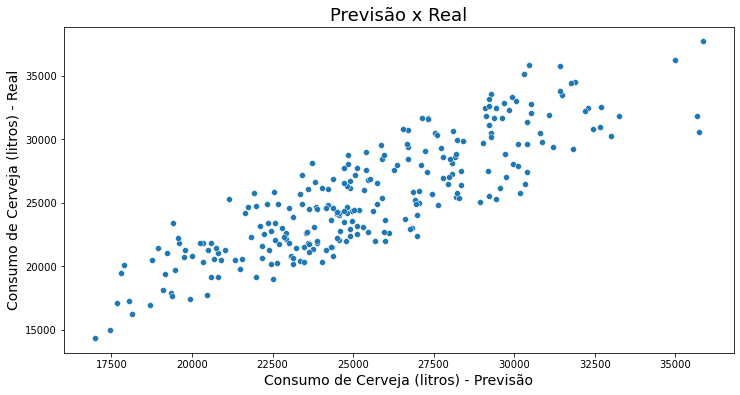

In [43]:
## gráfico de dispersão entre o valor estimado e o valor real

ax = sns.scatterplot(x=y_prev_train, y=y_train);
ax.figure.set_size_inches(12,6);
ax.set_title('Previsão x Real', fontsize=18);
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14);
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14);
ax;

In [44]:
## obtendo os resíduos

residuo = y_train - y_prev_train

### Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

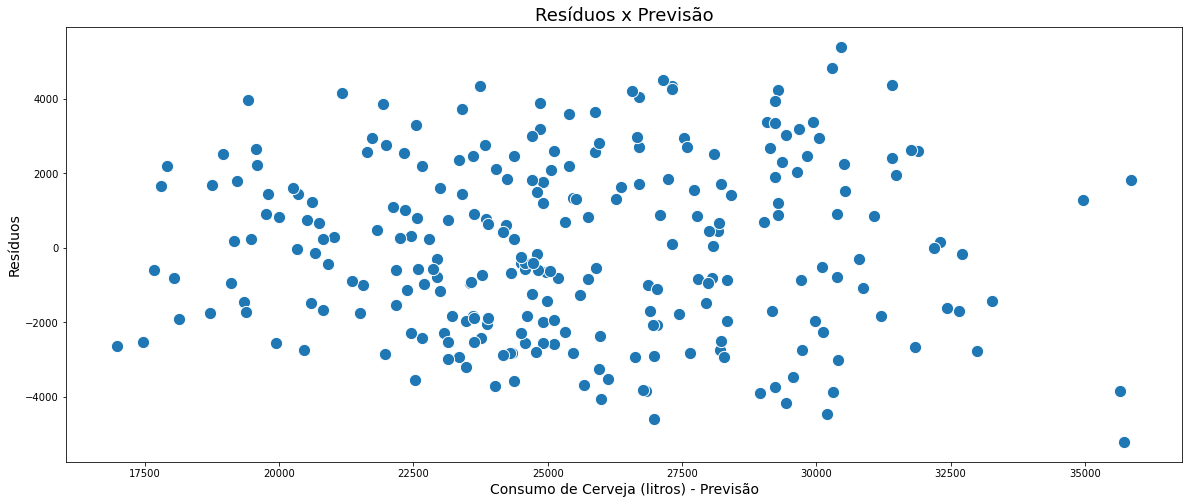

In [45]:
ax = sns.scatterplot(x=y_prev_train, y=residuo, s=150);
ax.figure.set_size_inches(20,8);
ax.set_title('Resíduos x Previsão', fontsize=18);
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14);
ax.set_ylabel('Resíduos', fontsize=14);
ax;

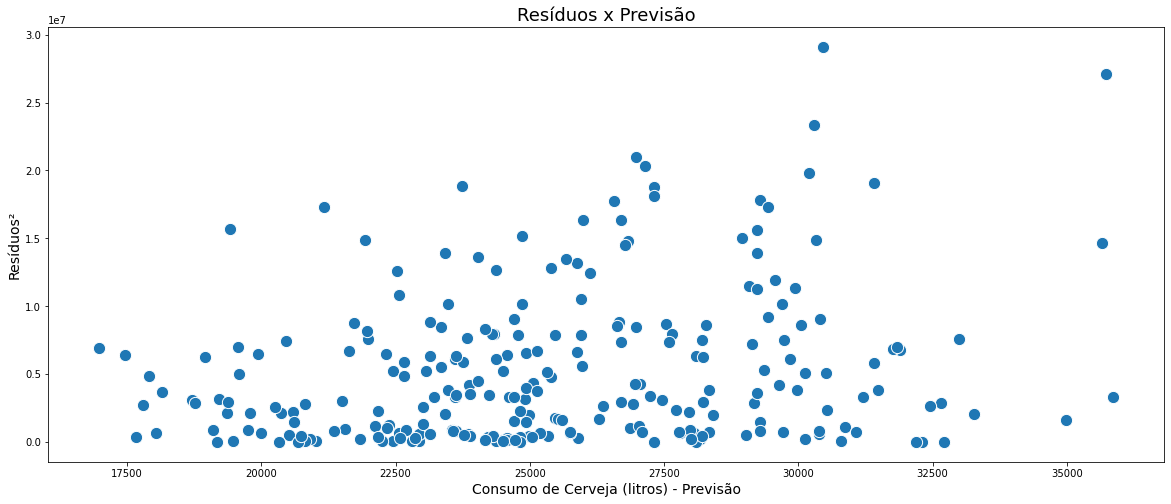

In [46]:
## resíduos ao quadrado

ax = sns.scatterplot(x=y_prev_train, y=residuo**2, s=150);
ax.figure.set_size_inches(20,8);
ax.set_title('Resíduos x Previsão', fontsize=18);
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14);
ax.set_ylabel('Resíduos²', fontsize=14);
ax;


### Plotando a Distribuição de Frequência dos Resíduos

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

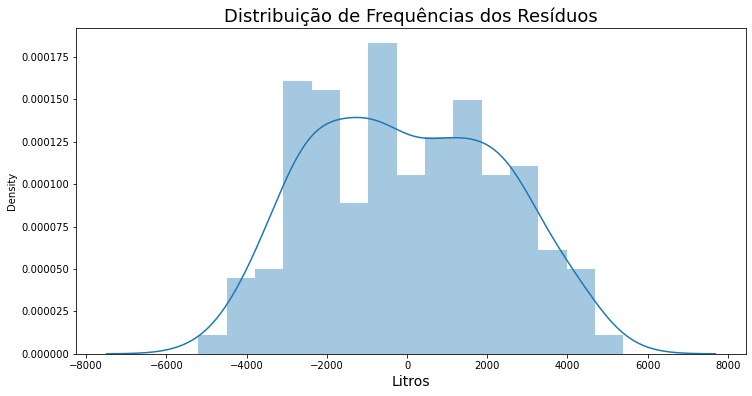

In [47]:
ax = sns.distplot(residuo, bins=15)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

## Comparando Modelos

In [48]:
## estimando um novo modelo com mudança de variável explicativa temperatura máxima por temperatura média

x2 = dados[['temp_media', 'chuva', 'fds']]

In [49]:
## criando os datasets de treino e teste

x2_train, x2_test, y2_train, y2_test =train_test_split(x2, y, test_size=0.3, random_state=2811)

In [50]:
## instanciando a classe LinearRegression()

modelo2 = LinearRegression()

In [51]:
## utilizando o método fit() do objeto "modelo2" para estimar nosso modelo linear utilizando 
## os dados de treino (y2_train e x2_train)

modelo2.fit(x2_train, y2_train)

LinearRegression()

In [52]:
## obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado anterior

print('Modelo com Temp. Média')
print('R² = {}'.format(modelo2.score(x2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [53]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


### Gerando previsões para os dados de teste utilizando o métoco predict() dos objetos modelo e modelo2

In [54]:
y_prev = modelo.predict(x_test)
y_prev2 = modelo2.predict(x2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [55]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_prev2).round(2)))

Modelo com Temp. Média
R² = 0.66


## Outras Métricas de Regressão

### Obtendo métricas para o modelo com Temperatura Média

In [56]:
eqm2 = metrics.mean_squared_error(y2_test, y_prev2).round(2)
reqm2 = np.sqrt(metrics.mean_squared_error(y2_test, y_prev2)).round(2)
r2_2 = metrics.r2_score(y2_test, y_prev2).round(2)

pd.DataFrame([eqm2, reqm2, r2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


### Obetendo métricas para o modelo com Temperatura Máxima

In [57]:
eqm = metrics.mean_squared_error(y_test, y_prev).round(2)
reqm = np.sqrt(metrics.mean_squared_error(y_test, y_prev)).round(2)
r2 = metrics.r2_score(y_test, y_prev).round(2)

pd.DataFrame([eqm, reqm, r2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## Salvando e Carregando o Modelo Estimado

### Simulador Simples

In [58]:
temp_max = 30.5
chuva = 12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


In [59]:
import pickle

In [60]:
output = open('modelo_consumo_cerveja', 'wb')

pickle.dump(modelo, output)
output.close()